In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("combined_games.csv") #Dataset 1
dataset.head()

,name,supported languages,full audio languages,windows,mac,linux,achievements,genres,price,positive,negative,owners,ccu,tags
0,Forza Horizon 4,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'German', 'Portuguese - ...",True,False,False,178,Racing,59.99,168343,20609,"2,000,000 .. 5,000,000",8344,"{'Racing': 610, 'Open World': 531, 'Driving': ..."
1,Oxygen Not Included,"['English', 'Simplified Chinese', 'Korean', 'R...","['English', 'Simplified Chinese', 'Korean', 'R...",True,True,True,45,"Indie,Simulation",24.99,99216,3475,"2,000,000 .. 5,000,000",10444,"{'Colony Sim': 2001, 'Base-Building': 1859, 'S..."
2,DEVOUR,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Hungarian']",True,True,False,74,Indie,3.99,58470,5242,"2,000,000 .. 5,000,000",1307,"{'Horror': 1173, 'Online Co-Op': 808, 'Multipl..."
3,Russian Fishing 4,"['English', 'German', 'Russian', 'Simplified C...",[],True,False,False,148,"Adventure,Casual,Free to Play,Massively Multip...",0.00,24793,7914,"2,000,000 .. 5,000,000",11153,"{'Fishing': 661, 'Free to Play': 647, 'Simulat..."
4,Mafia: Definitive Edition,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,43,"Action,Adventure",39.99,50833,7633,"1,000,000 .. 2,000,000",1141,"{'Action': 273, 'Open World': 273, 'Story Rich..."


In [3]:
import ast

In [4]:
# Function to process tags
def process_tags(row):
    try:
        # Convert tags string to dictionary
        tags = ast.literal_eval(row['tags'])
        # Remove tags that overlap with genres
        genres = set(row['genres'].split(','))
        filtered_tags = {tag: weight for tag, weight in tags.items() if tag not in genres}
        # Sort tags by weight (value) in descending order
        sorted_tags = sorted(filtered_tags.items(), key=lambda x: x[1], reverse=True)
        # Keep the top 4 tags
        top_tags = [tag for tag, weight in sorted_tags[:4]]
        # Count the tags that would have been deleted
        tag_other_count = max(0, len(tags) - len(top_tags))
        return top_tags, tag_other_count
    except Exception as e:
        return [], 0

# Display the first five rows of the `tags` column before processing
print("Before processing:")
print(dataset['tags'].head())

# Apply the tags processing and create new columns
dataset[['top_tags', 'tag_Other']] = dataset.apply(
    lambda row: pd.Series(process_tags(row)),
    axis=1
)

# Display the first five rows of the `tags` column after processing
print("\nAfter processing:")
print(dataset[['tags', 'top_tags', 'tag_Other']].head())

# Show the processed `tag_Other` column
print("\n`tag_Other` column after processing:")
print(dataset['tag_Other'].head())

Before processing:
0    {'Racing': 610, 'Open World': 531, 'Driving': ...
1    {'Colony Sim': 2001, 'Base-Building': 1859, 'S...
2    {'Horror': 1173, 'Online Co-Op': 808, 'Multipl...
3    {'Fishing': 661, 'Free to Play': 647, 'Simulat...
4    {'Action': 273, 'Open World': 273, 'Story Rich...
Name: tags, dtype: object

After processing:
                                                tags  \
0  {'Racing': 610, 'Open World': 531, 'Driving': ...   
1  {'Colony Sim': 2001, 'Base-Building': 1859, 'S...   
2  {'Horror': 1173, 'Online Co-Op': 808, 'Multipl...   
3  {'Fishing': 661, 'Free to Play': 647, 'Simulat...   
4  {'Action': 273, 'Open World': 273, 'Story Rich...   

                                            top_tags  tag_Other  
0  [Open World, Driving, Multiplayer, Automobile ...         16  
1  [Colony Sim, Base-Building, Survival, Resource...         16  
2  [Horror, Online Co-Op, Multiplayer, Survival H...         16  
3          [Fishing, Multiplayer, Nature, Realistic]        

In [5]:
tag_other_frequencies = dataset['tag_Other'].value_counts()

# Display the unique values and their frequencies
print("Frequencies of values in `tag_Other` column:")
print(tag_other_frequencies)

Frequencies of values in `tag_Other` column:
tag_Other
16    801
17      8
13      6
5       6
14      5
11      5
10      5
3       4
4       3
8       3
2       2
9       2
1       2
7       2
15      2
6       1
12      1
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
from collections import Counter

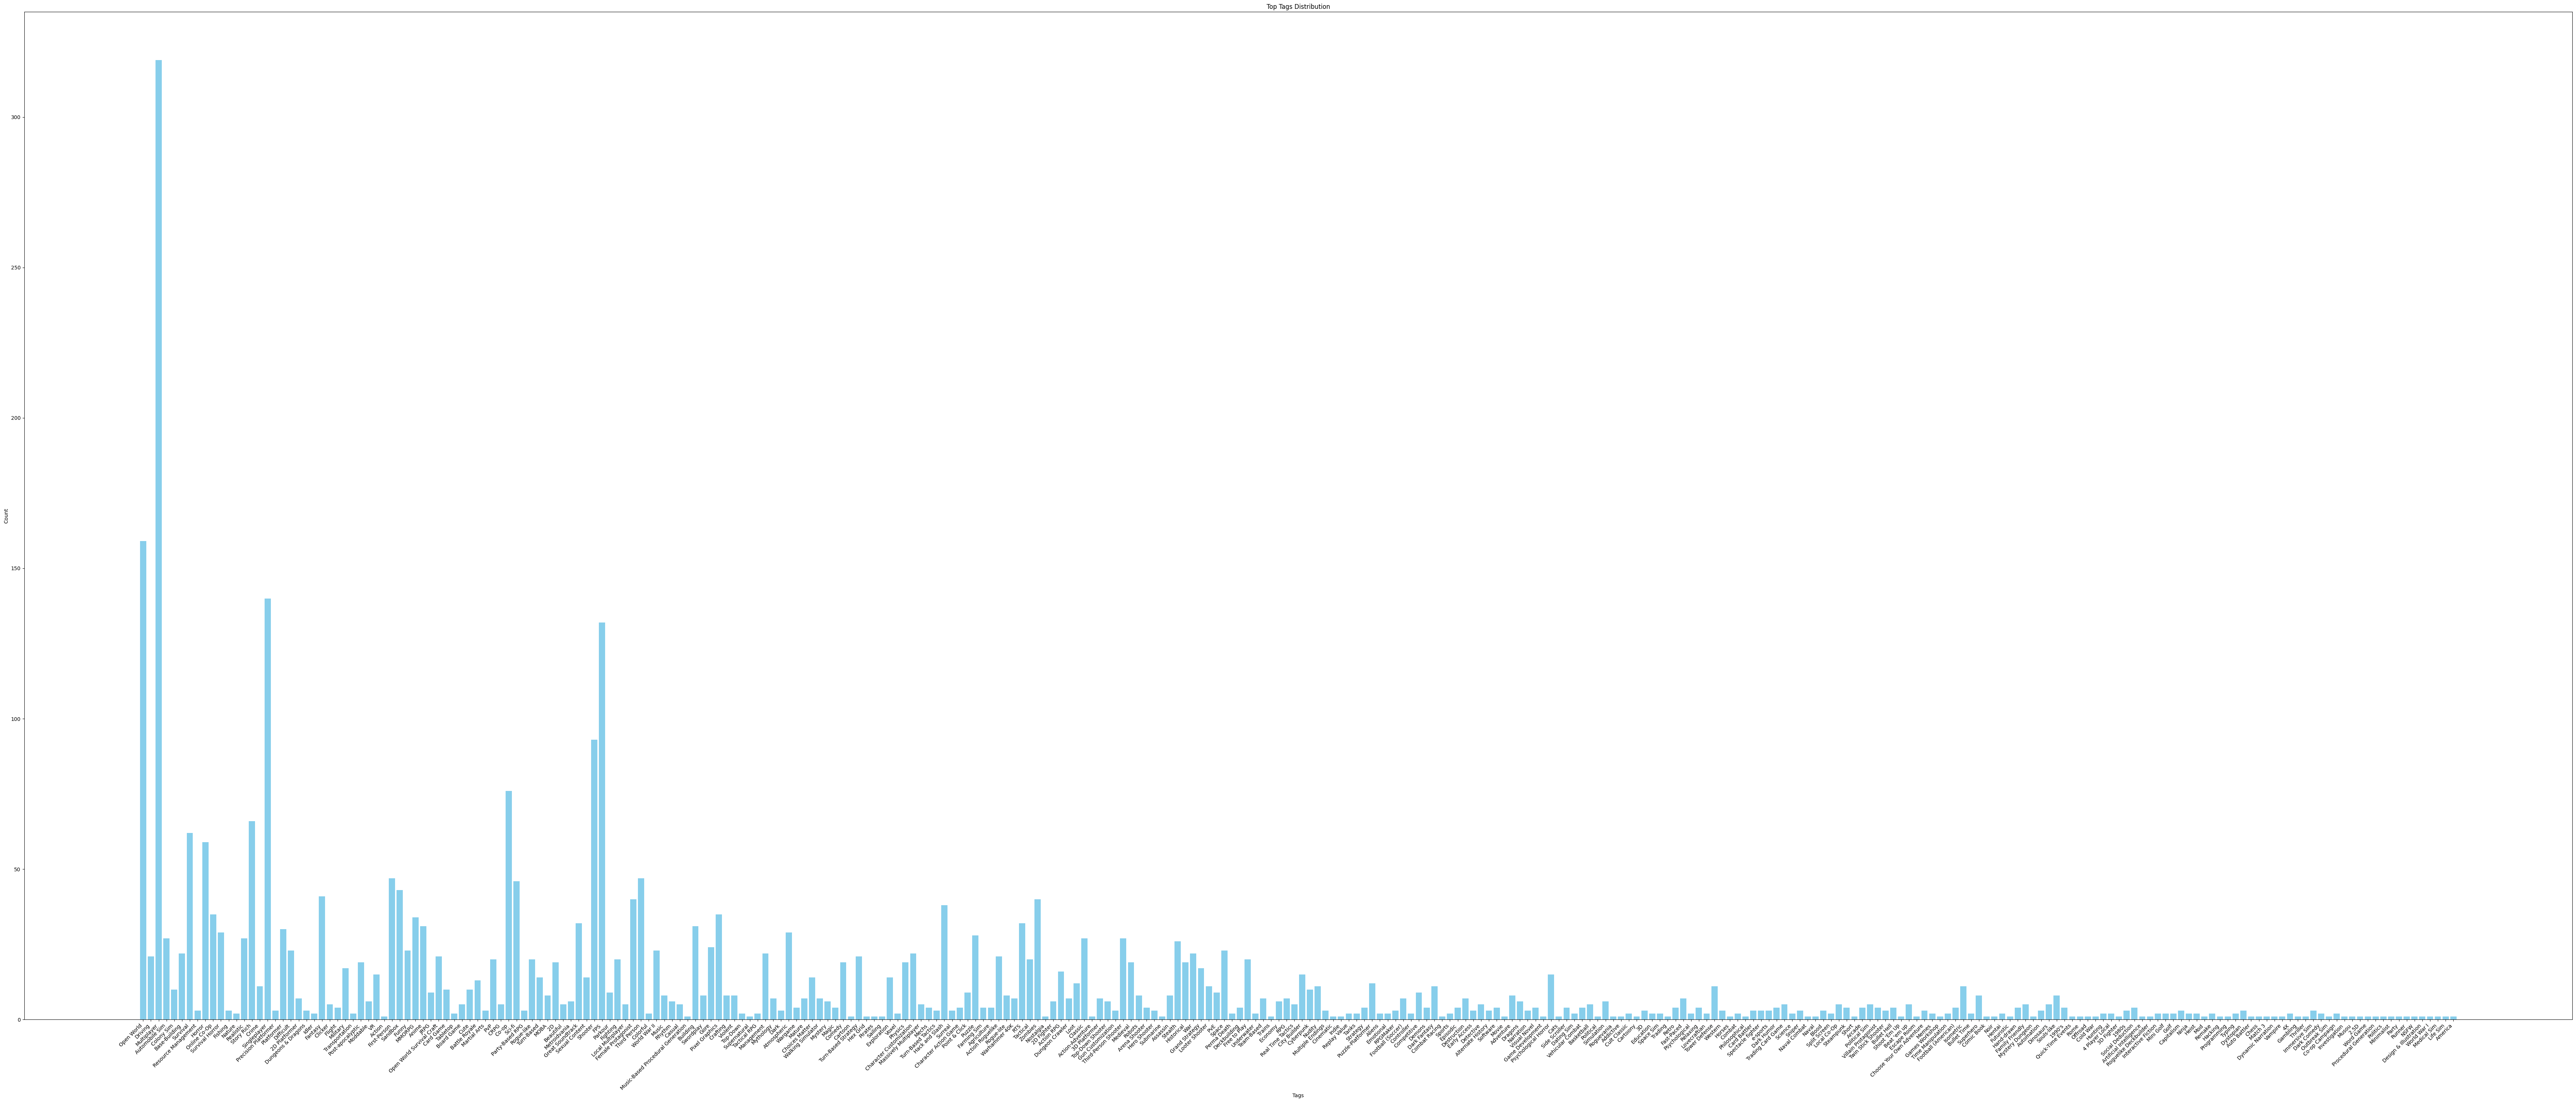

In [7]:
# Bar chart for `top_tags`
top_tags_list = [tag for tags in dataset['top_tags'] for tag in tags]
top_tags_count = Counter(top_tags_list)
plt.figure(figsize=(70, 30))
plt.bar(top_tags_count.keys(), top_tags_count.values(), color='skyblue')
plt.title("Top Tags Distribution")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

In [9]:
# Applying one-hot encoding with the 'tag_' prefix
mlb = MultiLabelBinarizer()
encoded_tags = pd.DataFrame(mlb.fit_transform(dataset['top_tags']), columns=['tag_' + tag for tag in mlb.classes_], index=dataset.index)

# Concatenating the encoded tags with the original dataset
dataset = pd.concat([dataset, encoded_tags], axis=1)

# Drop the 'top_tags' column
dataset.drop('top_tags', axis=1, inplace=True)

In [10]:
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Filter for columns that represent tags
tag_columns = [col for col in dataset.columns if col.startswith('tag_')]

# Print the total number of columns that start with 'tag_'
total_tag_columns = len(tag_columns)
print(f"Total number of columns that start with 'tag_': {total_tag_columns}")

# Calculate the frequency of each tag
tag_frequencies = dataset[tag_columns].sum().sort_values(ascending=False)

# Display the tags and their frequencies
print("\ntag Frequencies:")
print(tag_frequencies)

Total number of columns that start with 'tag_': 299

tag Frequencies:
tag_Other                                13369
tag_Multiplayer                            319
tag_Open World                             159
tag_Singleplayer                           140
tag_FPS                                    132
tag_Shooter                                 93
tag_Co-op                                   76
tag_Story Rich                              66
tag_Survival                                62
tag_Horror                                  59
tag_First-Person                            47
tag_Third Person                            47
tag_Sci-fi                                  46
tag_Sandbox                                 43
tag_Fantasy                                 41
tag_Female Protagonist                      40
tag_Zombies                                 40
tag_Hack and Slash                          38
tag_Online Co-Op                            35
tag_Pixel Graphics                   

In [11]:
# Define a threshold for minimum tag occurrences
min_tag_threshold = 10

# Calculate the sum for each genre column
tag_counts = dataset.iloc[:, dataset.columns.str.contains("tag_")].sum()

# Identify rare tags
rare_tags = tag_counts[tag_counts < min_tag_threshold].index

# Add the sum of rare tags to the existing 'tag_Other' column
dataset['tag_Other'] += dataset[rare_tags].sum(axis=1).astype(int)

# Drop the original rare tag columns
dataset.drop(columns=rare_tags, inplace=True)

# Display updated dataset
print(f"Updated tags: {dataset.columns[dataset.columns.str.contains('tag_')].tolist()}")


Updated tags: ['tag_Other', 'tag_2D', 'tag_Action RPG', 'tag_Action Roguelike', 'tag_Anime', 'tag_Atmospheric', 'tag_Automobile Sim', 'tag_Base-Building', 'tag_Battle Royale', 'tag_Building', 'tag_Card Game', 'tag_Character Customization', 'tag_Choices Matter', 'tag_City Builder', 'tag_Classic', 'tag_Co-op', 'tag_Colony Sim', 'tag_Comedy', 'tag_Crime', 'tag_Cute', 'tag_Cyberpunk', 'tag_Dark Fantasy', 'tag_Difficult', 'tag_Driving', 'tag_Exploration', 'tag_FPS', 'tag_Fantasy', 'tag_Female Protagonist', 'tag_Fighting', 'tag_First-Person', 'tag_Free to Play', 'tag_Funny', 'tag_Gore', 'tag_Grand Strategy', 'tag_Great Soundtrack', 'tag_Hack and Slash', 'tag_Historical', 'tag_Horror', 'tag_Isometric', 'tag_Loot', 'tag_Looter Shooter', 'tag_MMORPG', 'tag_Management', 'tag_Medieval', 'tag_Military', 'tag_Multiplayer', 'tag_Nudity', 'tag_Online Co-Op', 'tag_Open World', 'tag_Open World Survival Craft', 'tag_Physics', 'tag_Pixel Graphics', 'tag_Platformer', 'tag_Post-apocalyptic', 'tag_Psycholog

In [12]:
tag_other_frequencies = dataset['tag_Other'].value_counts()

# Display the unique values and their frequencies
print("Frequencies of values in `tag_Other` column:")
print(tag_other_frequencies)

Frequencies of values in `tag_Other` column:
tag_Other
16    366
17    289
18    125
19     32
6       6
13      5
11      5
12      5
8       4
2       3
14      3
5       3
15      3
4       2
20      2
7       2
10      1
3       1
9       1
Name: count, dtype: int64


In [13]:
# One-hot encode the genres and add a prefix to each new column
genres_split = dataset['genres'].str.get_dummies(sep=',').add_prefix('genre_')

# Concatenate the one-hot encoded genres back to the dataset
dataset = pd.concat([dataset, genres_split], axis=1)

# Drop the original 'genres' column
dataset.drop(columns=['genres'], inplace=True)

# Display the updated dataset columns
print("Updated dataset columns:", dataset.columns.tolist())

Updated dataset columns: ['name', 'supported languages', 'full audio languages', 'windows', 'mac', 'linux', 'achievements', 'price', 'positive', 'negative', 'owners', 'ccu', 'tags', 'tag_Other', 'tag_2D', 'tag_Action RPG', 'tag_Action Roguelike', 'tag_Anime', 'tag_Atmospheric', 'tag_Automobile Sim', 'tag_Base-Building', 'tag_Battle Royale', 'tag_Building', 'tag_Card Game', 'tag_Character Customization', 'tag_Choices Matter', 'tag_City Builder', 'tag_Classic', 'tag_Co-op', 'tag_Colony Sim', 'tag_Comedy', 'tag_Crime', 'tag_Cute', 'tag_Cyberpunk', 'tag_Dark Fantasy', 'tag_Difficult', 'tag_Driving', 'tag_Exploration', 'tag_FPS', 'tag_Fantasy', 'tag_Female Protagonist', 'tag_Fighting', 'tag_First-Person', 'tag_Free to Play', 'tag_Funny', 'tag_Gore', 'tag_Grand Strategy', 'tag_Great Soundtrack', 'tag_Hack and Slash', 'tag_Historical', 'tag_Horror', 'tag_Isometric', 'tag_Loot', 'tag_Looter Shooter', 'tag_MMORPG', 'tag_Management', 'tag_Medieval', 'tag_Military', 'tag_Multiplayer', 'tag_Nudity

In [14]:
# Calculate and display the frequency of each genre after one-hot encoding

# Filter for columns that represent genres
genre_columns = [col for col in dataset.columns if col.startswith('genre_')]

# Calculate the frequency of each genre
genre_frequencies = dataset[genre_columns].sum().sort_values(ascending=False)

# Display the genres and their frequencies
print("Genre Frequencies:")
print(genre_frequencies)

Genre Frequencies:
genre_Action                   567
genre_Indie                    349
genre_Adventure                325
genre_RPG                      202
genre_Free to Play             174
genre_Strategy                 173
genre_Simulation               173
genre_Massively Multiplayer    103
genre_Casual                   103
genre_Early Access              53
genre_Sports                    33
genre_Racing                    22
genre_Animation & Modeling       3
genre_Design & Illustration      2
genre_Utilities                  2
genre_Video Production           2
genre_Gore                       1
genre_Photo Editing              1
genre_Audio Production           1
genre_Violent                    1
dtype: int64


In [15]:
# Define a threshold for minimum genre occurrences
min_genre_threshold = 4

# Calculate the sum for each genre column
genre_counts = dataset.iloc[:, dataset.columns.str.contains("genre_")].sum()

# Identify rare genres
rare_genres = genre_counts[genre_counts < min_genre_threshold].index

# Create an 'Other' genre column and ensure integer values
dataset['genre_Other'] = dataset[rare_genres].sum(axis=1).astype(int)

# Drop the original rare genre columns
dataset.drop(columns=rare_genres, inplace=True)

# Display updated dataset
print(f"Updated genres: {dataset.columns[dataset.columns.str.contains('genre_')].tolist()}")

Updated genres: ['genre_Action', 'genre_Adventure', 'genre_Casual', 'genre_Early Access', 'genre_Free to Play', 'genre_Indie', 'genre_Massively Multiplayer', 'genre_RPG', 'genre_Racing', 'genre_Simulation', 'genre_Sports', 'genre_Strategy', 'genre_Other']


In [16]:
# Calculate and display the frequency of each genre after one-hot encoding

# Filter for columns that represent genres (adjust prefix as necessary)
genre_columns = [col for col in dataset.columns if col.startswith('genre_')]

# Calculate the frequency of each genre
genre_frequencies = dataset[genre_columns].sum().sort_values(ascending=False)

# Display the genres and their frequencies
print("Genre Frequencies:")
print(genre_frequencies)

Genre Frequencies:
genre_Action                   567
genre_Indie                    349
genre_Adventure                325
genre_RPG                      202
genre_Free to Play             174
genre_Simulation               173
genre_Strategy                 173
genre_Casual                   103
genre_Massively Multiplayer    103
genre_Early Access              53
genre_Sports                    33
genre_Racing                    22
genre_Other                     13
dtype: int64


In [17]:
dataset.head()

,name,supported languages,full audio languages,windows,mac,linux,achievements,price,positive,negative,owners,ccu,tags,tag_Other,tag_2D,tag_Action RPG,tag_Action Roguelike,tag_Anime,tag_Atmospheric,tag_Automobile Sim,tag_Base-Building,tag_Battle Royale,tag_Building,tag_Card Game,tag_Character Customization,tag_Choices Matter,tag_City Builder,tag_Classic,tag_Co-op,tag_Colony Sim,tag_Comedy,tag_Crime,tag_Cute,tag_Cyberpunk,tag_Dark Fantasy,tag_Difficult,tag_Driving,tag_Exploration,tag_FPS,tag_Fantasy,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Free to Play,tag_Funny,tag_Gore,tag_Grand Strategy,tag_Great Soundtrack,tag_Hack and Slash,tag_Historical,tag_Horror,tag_Isometric,tag_Loot,tag_Looter Shooter,tag_MMORPG,tag_Management,tag_Medieval,tag_Military,tag_Multiplayer,tag_Nudity,tag_Online Co-Op,tag_Open World,tag_Open World Survival Craft,tag_Physics,tag_Pixel Graphics,tag_Platformer,tag_Post-apocalyptic,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvP,tag_RTS,tag_Realistic,tag_Rogue-like,tag_Sandbox,tag_Sci-fi,tag_Sexual Content,tag_Shooter,tag_Singleplayer,tag_Space,tag_Stealth,tag_Story Rich,tag_Survival,tag_Survival Horror,tag_Tactical,tag_Third Person,tag_Third-Person Shooter,tag_Tower Defense,tag_Turn-Based,tag_Turn-Based Strategy,tag_VR,tag_War,tag_World War II,tag_Zombies,genre_Action,genre_Adventure,genre_Casual,genre_Early Access,genre_Free to Play,genre_Indie,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,genre_Other
0,Forza Horizon 4,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'German', 'Portuguese - ...",True,False,False,178,59.99,168343,20609,"2,000,000 .. 5,000,000",8344,"{'Racing': 610, 'Open World': 531, 'Driving': ...",16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Oxygen Not Included,"['English', 'Simplified Chinese', 'Korean', 'R...","['English', 'Simplified Chinese', 'Korean', 'R...",True,True,True,45,24.99,99216,3475,"2,000,000 .. 5,000,000",10444,"{'Colony Sim': 2001, 'Base-Building': 1859, 'S...",17,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,DEVOUR,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Hungarian']",True,True,False,74,3.99,58470,5242,"2,000,000 .. 5,000,000",1307,"{'Horror': 1173, 'Online Co-Op': 808, 'Multipl...",16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Russian Fishing 4,"['English', 'German', 'Russian', 'Simplified C...",[],True,False,False,148,0.00,24793,7914,"2,000,000 .. 5,000,000",11153,"{'Fishing': 661, 'Free to Play': 647, 'Simulat...",18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0
4,Mafia: Definitive Edition,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,43,39.99,50833,7633,"1,000,000 .. 2,000,000",1141,"{'Action': 273, 'Open World': 273, 'Story Rich...",16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Drop the 'tags' column
dataset.drop('tags', axis=1, inplace=True)

In [19]:
dataset.head()

,name,supported languages,full audio languages,windows,mac,linux,achievements,price,positive,negative,owners,ccu,tag_Other,tag_2D,tag_Action RPG,tag_Action Roguelike,tag_Anime,tag_Atmospheric,tag_Automobile Sim,tag_Base-Building,tag_Battle Royale,tag_Building,tag_Card Game,tag_Character Customization,tag_Choices Matter,tag_City Builder,tag_Classic,tag_Co-op,tag_Colony Sim,tag_Comedy,tag_Crime,tag_Cute,tag_Cyberpunk,tag_Dark Fantasy,tag_Difficult,tag_Driving,tag_Exploration,tag_FPS,tag_Fantasy,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Free to Play,tag_Funny,tag_Gore,tag_Grand Strategy,tag_Great Soundtrack,tag_Hack and Slash,tag_Historical,tag_Horror,tag_Isometric,tag_Loot,tag_Looter Shooter,tag_MMORPG,tag_Management,tag_Medieval,tag_Military,tag_Multiplayer,tag_Nudity,tag_Online Co-Op,tag_Open World,tag_Open World Survival Craft,tag_Physics,tag_Pixel Graphics,tag_Platformer,tag_Post-apocalyptic,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvP,tag_RTS,tag_Realistic,tag_Rogue-like,tag_Sandbox,tag_Sci-fi,tag_Sexual Content,tag_Shooter,tag_Singleplayer,tag_Space,tag_Stealth,tag_Story Rich,tag_Survival,tag_Survival Horror,tag_Tactical,tag_Third Person,tag_Third-Person Shooter,tag_Tower Defense,tag_Turn-Based,tag_Turn-Based Strategy,tag_VR,tag_War,tag_World War II,tag_Zombies,genre_Action,genre_Adventure,genre_Casual,genre_Early Access,genre_Free to Play,genre_Indie,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,genre_Other
0,Forza Horizon 4,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'German', 'Portuguese - ...",True,False,False,178,59.99,168343,20609,"2,000,000 .. 5,000,000",8344,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Oxygen Not Included,"['English', 'Simplified Chinese', 'Korean', 'R...","['English', 'Simplified Chinese', 'Korean', 'R...",True,True,True,45,24.99,99216,3475,"2,000,000 .. 5,000,000",10444,17,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,DEVOUR,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Hungarian']",True,True,False,74,3.99,58470,5242,"2,000,000 .. 5,000,000",1307,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Russian Fishing 4,"['English', 'German', 'Russian', 'Simplified C...",[],True,False,False,148,0.00,24793,7914,"2,000,000 .. 5,000,000",11153,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0
4,Mafia: Definitive Edition,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,43,39.99,50833,7633,"1,000,000 .. 2,000,000",1141,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Function to count the number of languages in a column
def count_languages(languages_column):
    return languages_column.apply(lambda x: len(eval(x)) if isinstance(x, str) and x.startswith('[') else 0)

In [21]:
# Process the supported languages
if 'supported languages' in dataset.columns:
    dataset['supported_languages_count'] = count_languages(dataset['supported languages'])
    dataset = dataset.drop(columns=['supported languages'])

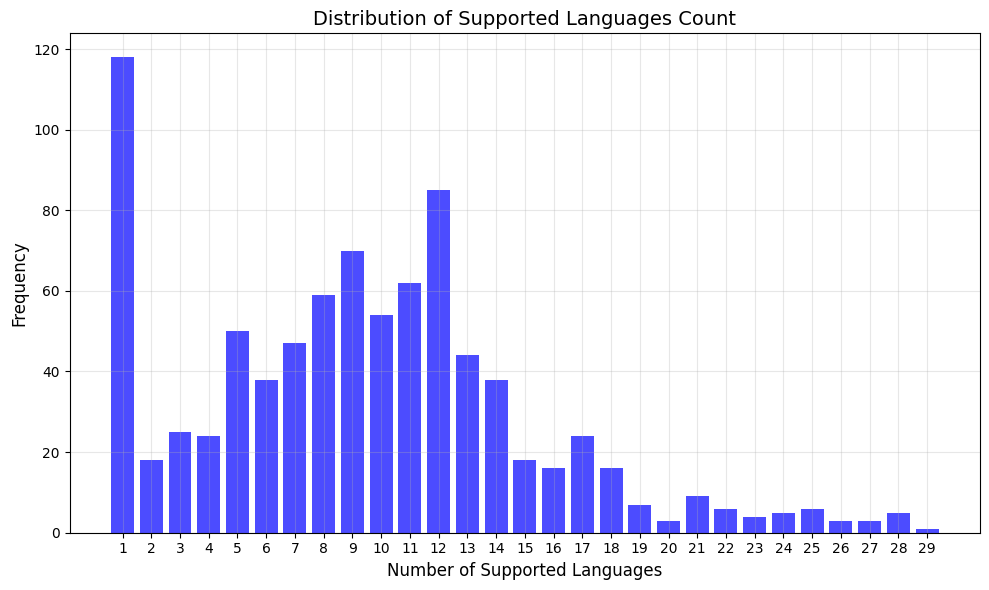

In [22]:
# Create a bar chart for supported languages count
if 'supported_languages_count' in dataset.columns:
    supported_count_distribution = dataset['supported_languages_count'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.bar(supported_count_distribution.index, supported_count_distribution.values, color='blue', alpha=0.7)
    plt.title('Distribution of Supported Languages Count', fontsize=14)
    plt.xlabel('Number of Supported Languages', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(supported_count_distribution.index, fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [23]:
# Process the full audio languages
if 'full audio languages' in dataset.columns:
    dataset['full_audio_languages_count'] = count_languages(dataset['full audio languages'])
    dataset = dataset.drop(columns=['full audio languages'])

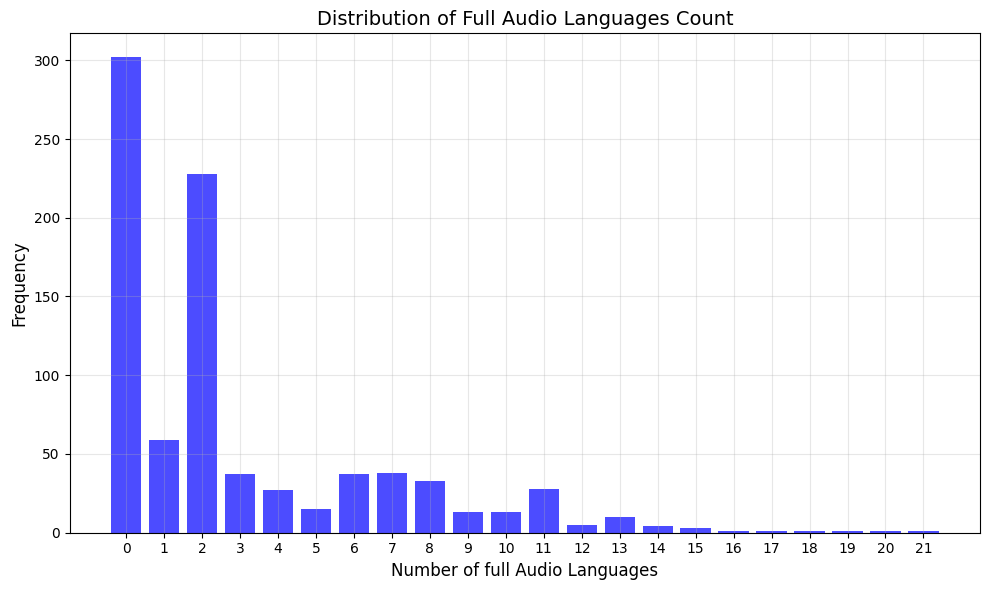

In [24]:
# Create a bar chart for full audio languages count
if 'full_audio_languages_count' in dataset.columns:
    supported_count_distribution = dataset['full_audio_languages_count'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.bar(supported_count_distribution.index, supported_count_distribution.values, color='blue', alpha=0.7)
    plt.title('Distribution of Full Audio Languages Count', fontsize=14)
    plt.xlabel('Number of full Audio Languages', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(supported_count_distribution.index, fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [25]:
# Count rows where the 'windows' column is True or False
if 'windows' in dataset.columns:
    windows_true_count = dataset['windows'].sum()
    windows_false_count = len(dataset) - windows_true_count
    print("Number of rows where 'windows' is True:", windows_true_count)
    print("Number of rows where 'windows' is False:", windows_false_count)

Number of rows where 'windows' is True: 858
Number of rows where 'windows' is False: 0


In [26]:
#Since it is always True, it doesn't have any useful information
dataset = dataset.drop(columns=['windows'])

In [27]:
# Convert 'mac' and 'linux' columns from True/False to 0/1
if 'mac' in dataset.columns:
    dataset['mac'] = dataset['mac'].astype(int)
if 'linux' in dataset.columns:
    dataset['linux'] = dataset['linux'].astype(int)

In [28]:
dataset.head()

,name,mac,linux,achievements,price,positive,negative,owners,ccu,tag_Other,tag_2D,tag_Action RPG,tag_Action Roguelike,tag_Anime,tag_Atmospheric,tag_Automobile Sim,tag_Base-Building,tag_Battle Royale,tag_Building,tag_Card Game,tag_Character Customization,tag_Choices Matter,tag_City Builder,tag_Classic,tag_Co-op,tag_Colony Sim,tag_Comedy,tag_Crime,tag_Cute,tag_Cyberpunk,tag_Dark Fantasy,tag_Difficult,tag_Driving,tag_Exploration,tag_FPS,tag_Fantasy,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Free to Play,tag_Funny,tag_Gore,tag_Grand Strategy,tag_Great Soundtrack,tag_Hack and Slash,tag_Historical,tag_Horror,tag_Isometric,tag_Loot,tag_Looter Shooter,tag_MMORPG,tag_Management,tag_Medieval,tag_Military,tag_Multiplayer,tag_Nudity,tag_Online Co-Op,tag_Open World,tag_Open World Survival Craft,tag_Physics,tag_Pixel Graphics,tag_Platformer,tag_Post-apocalyptic,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvP,tag_RTS,tag_Realistic,tag_Rogue-like,tag_Sandbox,tag_Sci-fi,tag_Sexual Content,tag_Shooter,tag_Singleplayer,tag_Space,tag_Stealth,tag_Story Rich,tag_Survival,tag_Survival Horror,tag_Tactical,tag_Third Person,tag_Third-Person Shooter,tag_Tower Defense,tag_Turn-Based,tag_Turn-Based Strategy,tag_VR,tag_War,tag_World War II,tag_Zombies,genre_Action,genre_Adventure,genre_Casual,genre_Early Access,genre_Free to Play,genre_Indie,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,genre_Other,supported_languages_count,full_audio_languages_count
0,Forza Horizon 4,0,0,178,59.99,168343,20609,"2,000,000 .. 5,000,000",8344,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,16,6
1,Oxygen Not Included,1,1,45,24.99,99216,3475,"2,000,000 .. 5,000,000",10444,17,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,4,4
2,DEVOUR,1,0,74,3.99,58470,5242,"2,000,000 .. 5,000,000",1307,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,21,2
3,Russian Fishing 4,0,0,148,0.00,24793,7914,"2,000,000 .. 5,000,000",11153,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,13,0
4,Mafia: Definitive Edition,0,0,43,39.99,50833,7633,"1,000,000 .. 2,000,000",1141,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,14,8


In [29]:
# Define categories for reviews
def categorize_reviews(positive, negative):
    total = positive + negative
    if total == 0:
        return 0
    ratio = positive / total
    if ratio >= 0.9:
        return 5
    elif ratio >= 0.7:
        return 4
    elif ratio >= 0.4:
        return 3
    elif ratio >= 0.1:
        return 2
    else:
        return 1

dataset['review_category'] = dataset.apply(lambda x: categorize_reviews(x['positive'], x['negative']), axis=1)

In [30]:
# Define categories for total reviews
def categorize_total_reviews(total_reviews):
    if total_reviews == 0:
        return 0
    elif total_reviews < 1000:
        return 1
    elif total_reviews < 10000:
        return 2
    elif total_reviews < 50000:
        return 3
    else:
        return 4

total_reviews = dataset['positive'] + dataset['negative']
dataset['review_count_category'] = total_reviews.apply(categorize_total_reviews)

In [31]:
dataset.drop(['positive', 'negative'], axis=1, inplace=True)

In [32]:
# Convert 'owners' column from range to average
def calculate_average_owners(owners_range):
    try:
        # Remove commas and split by the '..' separator
        min_val, max_val = map(int, owners_range.replace(',', '').split('..'))
        return (min_val + max_val) / 2
    except Exception as e:
        print(f"Error processing range '{owners_range}': {e}")
        return None

if 'owners' in dataset.columns:
    dataset['owners_average'] = dataset['owners'].apply(calculate_average_owners)

# Display the updated dataset
print(dataset[['owners', 'owners_average']].head())
dataset = dataset.drop(columns=['owners'])

# Compute skewness
skewness = dataset['owners_average'].skew()
skewness

                   owners  owners_average
0  2,000,000 .. 5,000,000       3500000.0
1  2,000,000 .. 5,000,000       3500000.0
2  2,000,000 .. 5,000,000       3500000.0
3  2,000,000 .. 5,000,000       3500000.0
4  1,000,000 .. 2,000,000       1500000.0


16.18200772090447

In [33]:
dataset.head()

,name,mac,linux,achievements,price,ccu,tag_Other,tag_2D,tag_Action RPG,tag_Action Roguelike,tag_Anime,tag_Atmospheric,tag_Automobile Sim,tag_Base-Building,tag_Battle Royale,tag_Building,tag_Card Game,tag_Character Customization,tag_Choices Matter,tag_City Builder,tag_Classic,tag_Co-op,tag_Colony Sim,tag_Comedy,tag_Crime,tag_Cute,tag_Cyberpunk,tag_Dark Fantasy,tag_Difficult,tag_Driving,tag_Exploration,tag_FPS,tag_Fantasy,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Free to Play,tag_Funny,tag_Gore,tag_Grand Strategy,tag_Great Soundtrack,tag_Hack and Slash,tag_Historical,tag_Horror,tag_Isometric,tag_Loot,tag_Looter Shooter,tag_MMORPG,tag_Management,tag_Medieval,tag_Military,tag_Multiplayer,tag_Nudity,tag_Online Co-Op,tag_Open World,tag_Open World Survival Craft,tag_Physics,tag_Pixel Graphics,tag_Platformer,tag_Post-apocalyptic,tag_Psychological Horror,tag_Puzzle,tag_Puzzle-Platformer,tag_PvP,tag_RTS,tag_Realistic,tag_Rogue-like,tag_Sandbox,tag_Sci-fi,tag_Sexual Content,tag_Shooter,tag_Singleplayer,tag_Space,tag_Stealth,tag_Story Rich,tag_Survival,tag_Survival Horror,tag_Tactical,tag_Third Person,tag_Third-Person Shooter,tag_Tower Defense,tag_Turn-Based,tag_Turn-Based Strategy,tag_VR,tag_War,tag_World War II,tag_Zombies,genre_Action,genre_Adventure,genre_Casual,genre_Early Access,genre_Free to Play,genre_Indie,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,genre_Other,supported_languages_count,full_audio_languages_count,review_category,review_count_category,owners_average
0,Forza Horizon 4,0,0,178,59.99,8344,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,16,6,4,4,3500000.0
1,Oxygen Not Included,1,1,45,24.99,10444,17,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,4,4,5,4,3500000.0
2,DEVOUR,1,0,74,3.99,1307,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,21,2,5,4,3500000.0
3,Russian Fishing 4,0,0,148,0.00,11153,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,13,0,4,3,3500000.0
4,Mafia: Definitive Edition,0,0,43,39.99,1141,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,14,8,4,4,1500000.0


In [34]:
import seaborn as sns

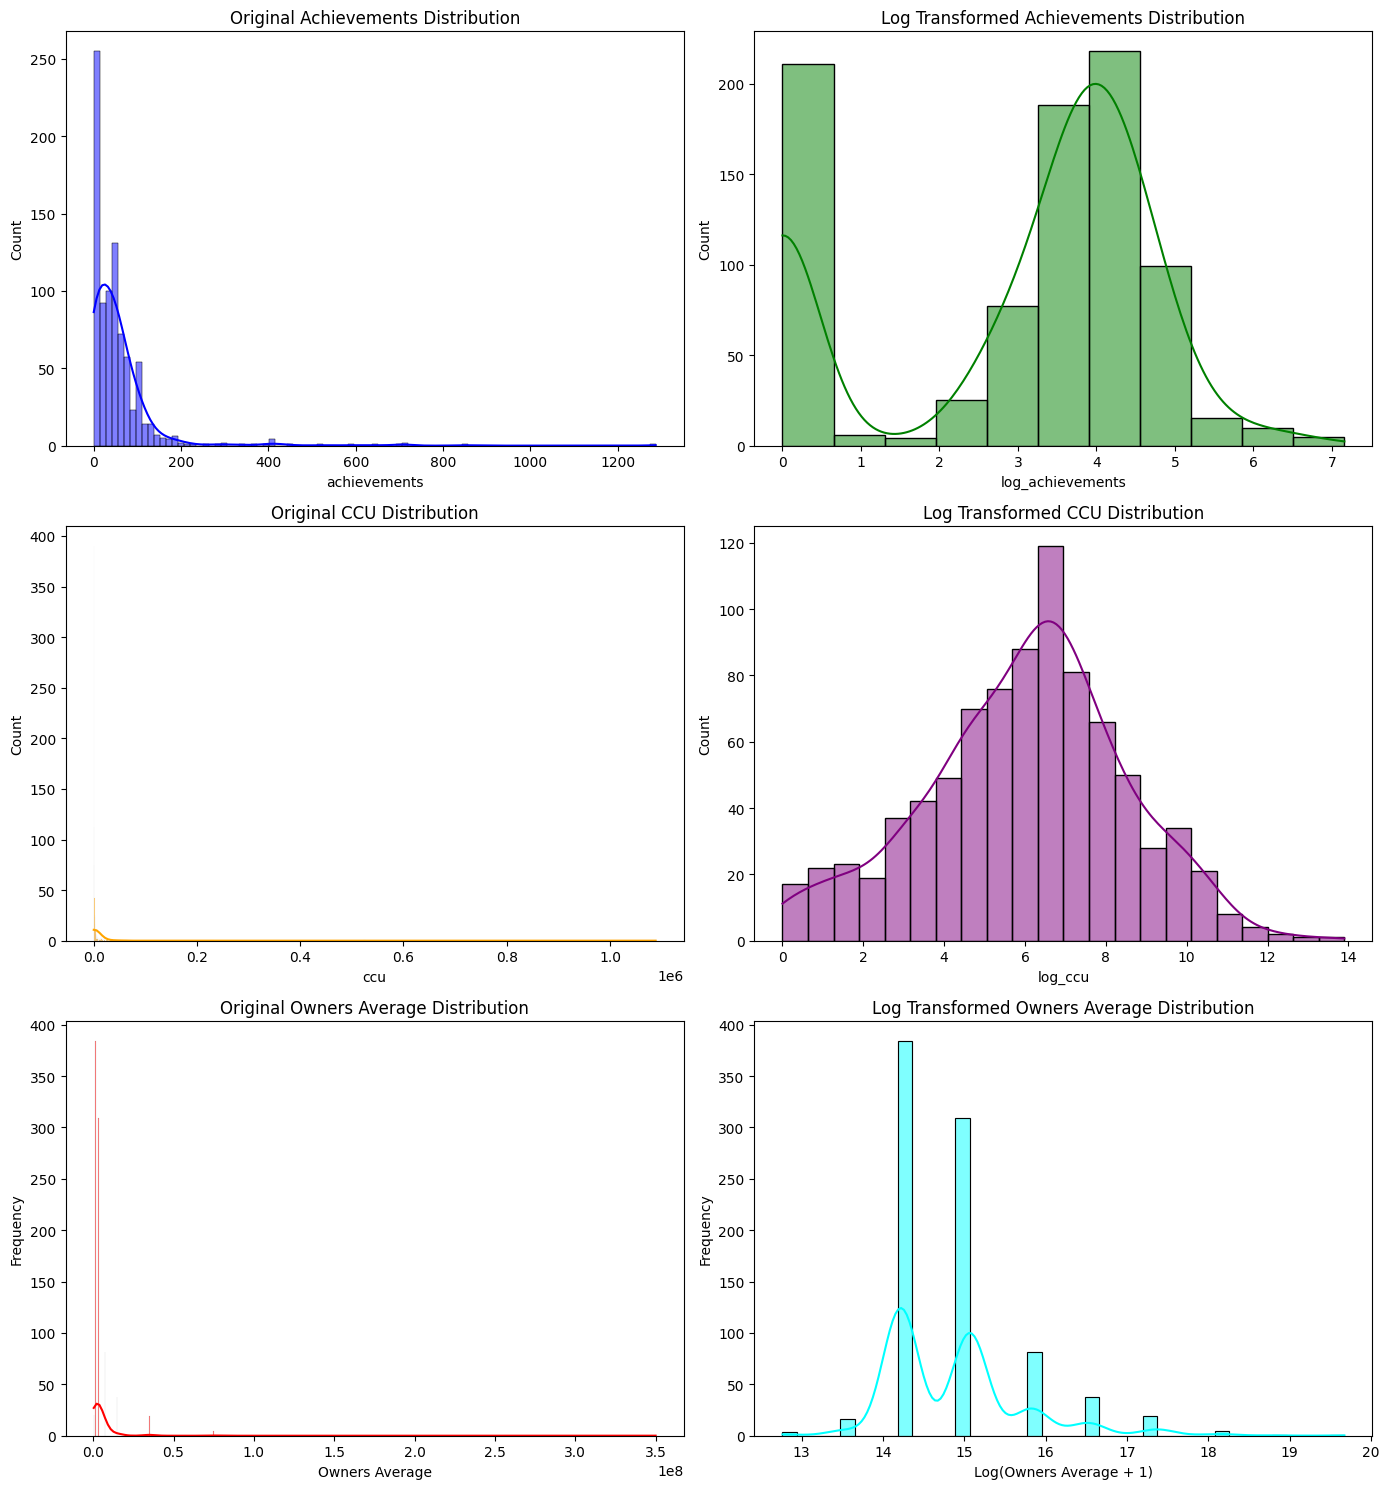

In [35]:
# Add 1 to avoid log(0) issues
dataset['log_achievements'] = np.log1p(dataset['achievements'])
dataset['log_ccu'] = np.log1p(dataset['ccu'])
dataset['log_owners_average'] = np.log1p(dataset['owners_average']) # added log transform


# Plot the transformed distributions
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Original and transformed for 'achievements'
sns.histplot(dataset['achievements'], kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Original Achievements Distribution")
sns.histplot(dataset['log_achievements'], kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Log Transformed Achievements Distribution")

# Original and transformed for 'ccu'
sns.histplot(dataset['ccu'], kde=True, ax=axes[1, 0], color="orange")
axes[1, 0].set_title("Original CCU Distribution")
sns.histplot(dataset['log_ccu'], kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Log Transformed CCU Distribution")

# Original and transformed for 'owners_average'
sns.histplot(dataset['owners_average'], kde=True, ax=axes[2, 0], color="red")
axes[2, 0].set_title("Original Owners Average Distribution")
axes[2, 0].set_xlabel("Owners Average")
axes[2, 0].set_ylabel("Frequency")


sns.histplot(dataset['log_owners_average'], kde=True, ax=axes[2, 1], color="cyan")
axes[2, 1].set_title("Log Transformed Owners Average Distribution")
axes[2, 1].set_xlabel("Log(Owners Average + 1)")
axes[2, 1].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

In [36]:
skewness = dataset['log_achievements'].skew()
skewness

-0.6831280063658924

In [37]:
skewness = dataset['log_ccu'].skew()
skewness

-0.2135808584541915

In [38]:
skewness = dataset['log_owners_average'].skew()
skewness

1.4000953729141026

In [39]:
dataset.drop(['achievements', 'ccu', 'owners_average', 'name'], axis=1, inplace=True)

In [40]:
from scipy.stats import boxcox

In [41]:
# Filter out zero prices (Box-Cox cannot handle zeros)
non_zero_prices = dataset[dataset['price'] > 0]['price']

# Apply Box-Cox transformation
transformed_prices, lambda_price = boxcox(non_zero_prices)

# Replace the original `price` with the transformed values for non-zero entries
dataset.loc[dataset['price'] > 0, 'price_transformed'] = transformed_prices
dataset.loc[dataset['price'] == 0, 'price_transformed'] = 0  # Keep zeros as zeros

# Drop the original price column
data = dataset.drop(columns=['price'])

# Print the lambda value used for Box-Cox transformation
print(f"Box-Cox lambda value for 'price': {lambda_price}")

Box-Cox lambda value for 'price': 0.3855872119446461


In [42]:
# Save the updated dataset to a new CSV file
data.to_csv('preprocessed_data_with_boxcox.csv', index=False)